# **Signal Processing and Graphs - Lab 1**

In this Colab, we will write familiarize ourselves with Networkx.

To start, we will load a classic graph in network science, the [Karate Club Network](https://en.wikipedia.org/wiki/Zachary%27s_karate_club). We will explore multiple graph statistics for that graph.



# Graph Basics
To start, we will load a classic graph in network science, the [Karate Club Network](https://en.wikipedia.org/wiki/Zachary%27s_karate_club). We will explore multiple graph statistics for that graph.

## Setup
We will heavily use NetworkX in this Colab.

In [ ]:
import networkx as nx # the main library
import numpy as np   # for basic math

import matplotlib.pyplot as plt # for ploting
from random import randint     #for iterations in a graph (e.g. for graphlets)



## Zachary's karate club network

The [Karate Club Network](https://en.wikipedia.org/wiki/Zachary%27s_karate_club) is a graph which describes a social network of 34 members of a karate club and documents links between members who interacted outside the club.

In [ ]:
G = nx.karate_club_graph()

# G is an undirected graph
type(G)

networkx.classes.graph.Graph

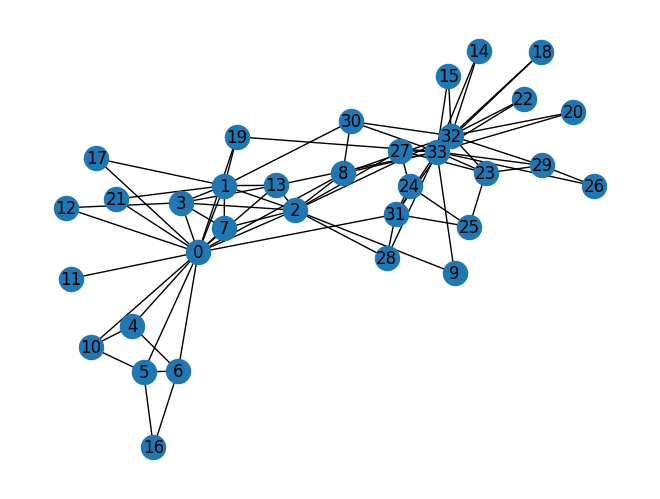

In [ ]:
# Visualize the graph
nx.draw(G, with_labels = True)

In [ ]:
G.number_of_nodes()

34

In [ ]:
G.number_of_edges()

78

## What is the average degree of the karate club network?

In [ ]:
def average_degree(num_edges, num_nodes):
  # TODO: Implement this function that takes number of edges
  # and number of nodes, and returns the average node degree of
  # the graph. Round the result to nearest integer (for example
  # 3.3 will be rounded to 3 and 3.7 will be rounded to 4)

  avg_degree = 0

  ############# Your code here ############

  #########################################

  return avg_degree

num_edges = G.number_of_edges()
num_nodes = G.number_of_nodes()
avg_degree = average_degree(num_edges, num_nodes)
print("Average degree of karate club network is {}".format(avg_degree))

Average degree of karate club network is 0


In [ ]:
shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(G))
shortest_path_lengths[2][15]

2

In [ ]:
# Compute the average shortest path length for each node
average_path_lengths = [
    np.mean(list(spl.values())) for spl in shortest_path_lengths.values()
]

print(average_path_lengths)

# The average over all nodes
np.mean(average_path_lengths)

[1.7058823529411764, 2.0, 1.7352941176470589, 2.088235294117647, 2.5588235294117645, 2.5294117647058822, 2.5294117647058822, 2.2058823529411766, 1.8823529411764706, 2.235294117647059, 2.5588235294117645, 2.6470588235294117, 2.6176470588235294, 1.8823529411764706, 2.6176470588235294, 2.6176470588235294, 3.411764705882353, 2.588235294117647, 2.6176470588235294, 1.9411764705882353, 2.6176470588235294, 2.588235294117647, 2.6176470588235294, 2.4705882352941178, 2.588235294117647, 2.588235294117647, 2.676470588235294, 2.1176470588235294, 2.1470588235294117, 2.5294117647058822, 2.1176470588235294, 1.7941176470588236, 1.8823529411764706, 1.7647058823529411]


2.3373702422145324

In [ ]:
# This is equivalent to `diameter = nx.diameter(G), but much more efficient since we're
# reusing the pre-computed shortest path lengths!
diameter = max(nx.eccentricity(G, sp=shortest_path_lengths).values())
diameter

5

Text(0, 0.5, 'Frequency (%)')

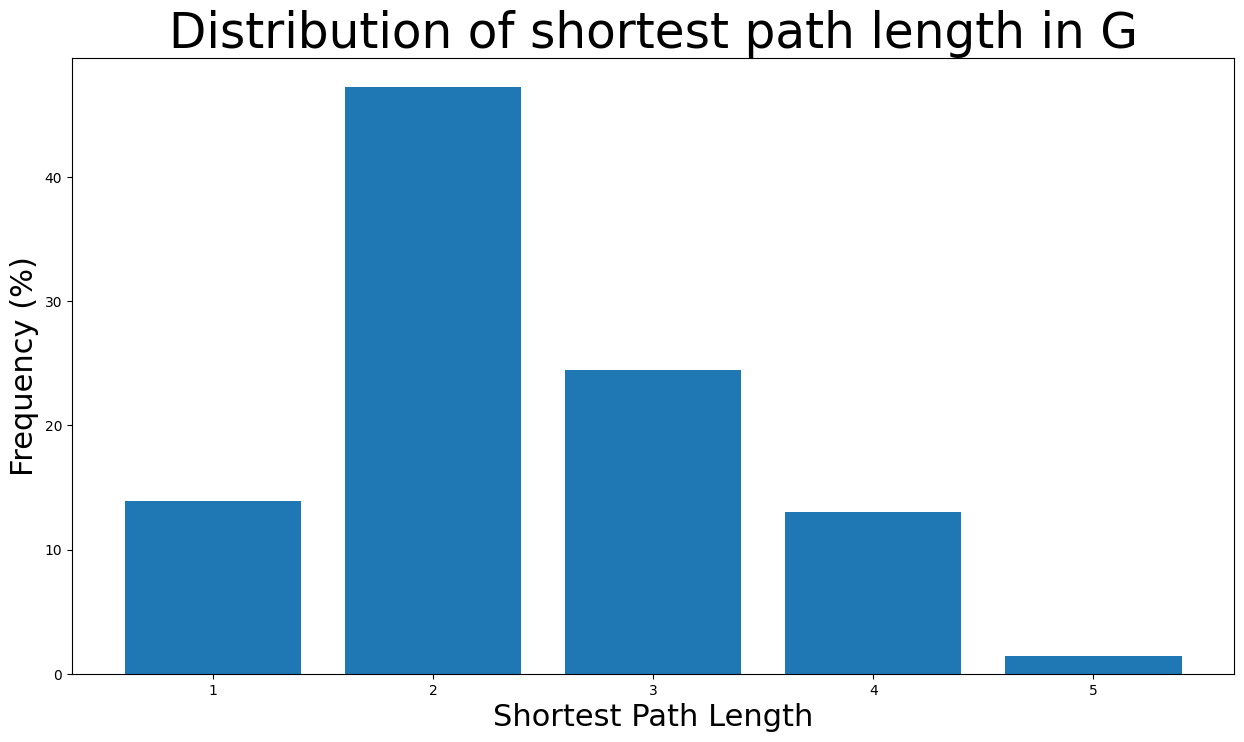

In [ ]:
# We know the maximum shortest path length (the diameter), so create an array
# to store values from 0 up to (and including) diameter
path_lengths = np.zeros(diameter + 1, dtype=int)

# Extract the frequency of shortest path lengths between two nodes
for pls in shortest_path_lengths.values():
    pl, cnts = np.unique(list(pls.values()), return_counts=True)
    path_lengths[pl] += cnts

# Express frequency distribution as a percentage (ignoring path lengths of 0)
freq_percent = 100 * path_lengths[1:] / path_lengths[1:].sum()

# Plot the frequency distribution (ignoring path lengths of 0) as a percentage
fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(np.arange(1, diameter + 1), height=freq_percent)
ax.set_title(
    "Distribution of shortest path length in G", fontdict={"size": 35}, loc="center"
)
ax.set_xlabel("Shortest Path Length", fontdict={"size": 22})
ax.set_ylabel("Frequency (%)", fontdict={"size": 22})


**Degree centrality** assigns an importance score based simply on the number of links held by each node. In this analysis, that means that the higher the degree centrality of a node is, the more edges are connected to the particular node and thus the more neighbor nodes this node has. In fact, the degree of centrality of a node is the fraction of nodes it is connected to. In other words, it is the percentage of the network that the particular node is connected to meaning being friends with.


Starting, we find the nodes with the highest degree centralities. Specifically, the nodes with the 8 highest degree centralities are shown below together with the degree centrality:

In [ ]:
degree_centrality = nx.centrality.degree_centrality(
    G
)  # save results in a variable to use again
(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True))[:8]

[(33, 0.5151515151515151),
 (0, 0.48484848484848486),
 (32, 0.36363636363636365),
 (2, 0.30303030303030304),
 (1, 0.2727272727272727),
 (3, 0.18181818181818182),
 (31, 0.18181818181818182),
 (8, 0.15151515151515152)]

Now we can also see the number of neighbors for the nodes with the highest degree centralities:


In [ ]:

(sorted(G.degree, key=lambda item: item[1], reverse=True))[:8]

[(33, 17), (0, 16), (32, 12), (2, 10), (1, 9), (3, 6), (31, 6), (8, 5)]

Now the distribution of degree centralities will be plotted:


Text(0, 0.5, 'Counts')

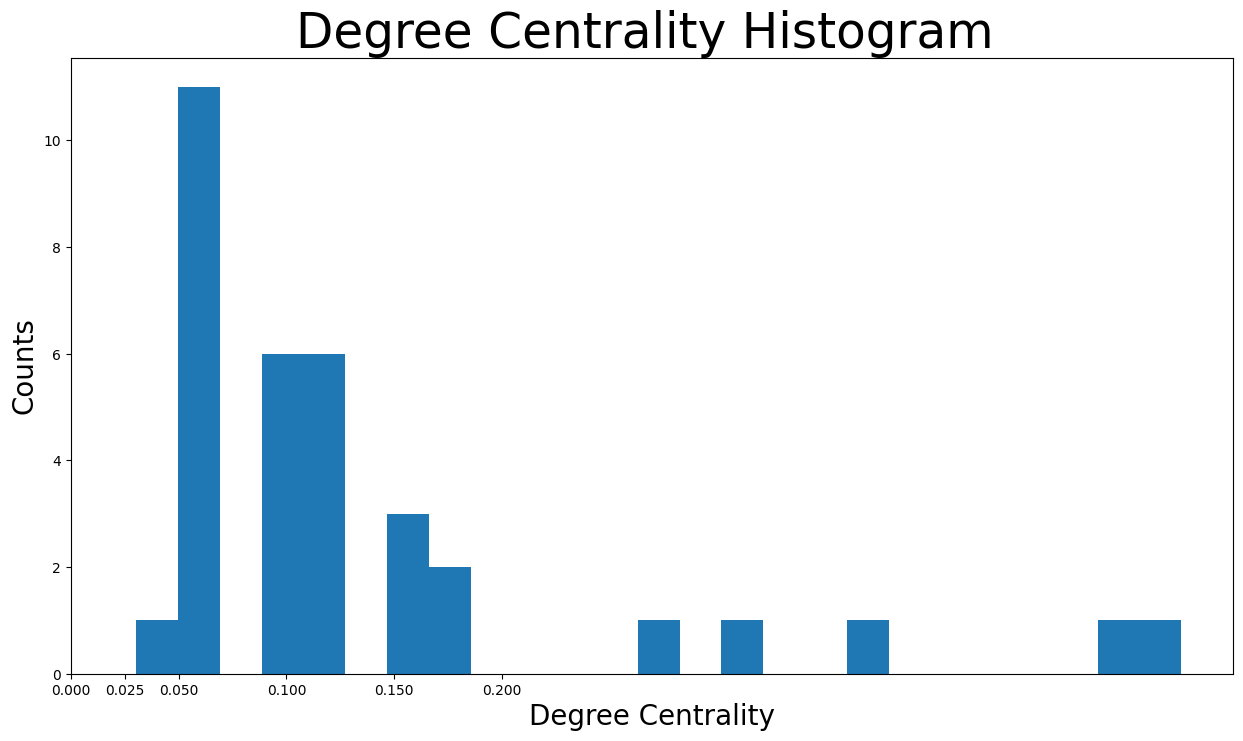

In [ ]:

plt.figure(figsize=(15, 8))
plt.hist(degree_centrality.values(), bins=25)
plt.xticks(ticks=[0, 0.025, 0.05, 0.1, 0.15, 0.2])  # set the x axis ticks
plt.title("Degree Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Degree Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})

### **Betweenness centrality** measures the number of times a node lies on the shortest path between other nodes, meaning it acts as a bridge. In detail, betweenness centrality of a node is the percentage of all the shortest paths of any two nodes (apart from ), which pass through.


#    $c_{v}=\sum_{s\neq v\neq t}\frac{\#(s h o r t e s t\;p a t h s\;b e t w e e n\; s \; a n d\; t\; t h a t\;c o n t a i n\;v)}{\ \#(s h o r t e s t\;p a t h s\;b e t w e e n\;s\;a n d\;t)}$



Now, the nodes with the  highest betweenness centralities will be calculated and shown with their centrality values:

In [ ]:


betweenness_centrality = nx.centrality.betweenness_centrality(
    G
)  # save results in a variable to use again

## **Closeness centrality** scores each node based on their ‘closeness’ to all other nodes in the network. For a node , its closeness centrality measures the average farness to all other nodes. In other words, the higher the closeness centrality of , the closer it is located to the center of the network.
# $c_{v}=\frac{1}{\sum_{u\neq v} {s h o r t e s t\;p a t h\; l e n g t h\;b e t w e e n\;u\;a n d\;v}}$

In [ ]:
closeness_centrality = nx.centrality.closeness_centrality(
    G
)  # save results in a variable to use again

### **Eigenvector centrality** is the metric to show how connected a node is to other important nodes in the network. It measures a node’s influence based on how well it is connected inside the network and how many links its connections have and so on. This measure can identify the nodes with the most influence over the whole network. A high eigenvector centrality means that the node is connected to other nodes who themselves have high eigenvector centralities.
# $c_{u}=\frac{1}{\lambda}\sum_{v\in N(u)}c_{v}$

In [ ]:
eigenvector_centrality = nx.centrality.eigenvector_centrality(
    G
)  # save results in a variable to use again

### The **clustering coefficient** of a node  is defined as the probability that two randomly selected friends of are friends with each other. As a result, the average clustering coefficient is the average of clustering coefficients of all the nodes. The closer the average clustering coefficient is to 1, the more complete the graph will be because there’s just one giant component. Lastly, it is a sign of triadic closure because the more complete the graph is, the more triangles will usually arise. $e_{v}={\frac{\left|\left(u_{1},u_{2}\right)\in E:u_{1},u_{2}\in N(v)\right|}{{k_v \choose 2}}}$   


In [ ]:
nx.clustering(G).values()

dict_values([0.15, 0.3333333333333333, 0.24444444444444444, 0.6666666666666666, 0.6666666666666666, 0.5, 0.5, 1.0, 0.5, 0, 0.6666666666666666, 0, 1.0, 0.6, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3333333333333333, 1.0, 1.0, 1.0, 0.4, 0.3333333333333333, 0.3333333333333333, 1.0, 0.16666666666666666, 0.3333333333333333, 0.6666666666666666, 0.5, 0.2, 0.19696969696969696, 0.11029411764705882])

Example of graphlets


In [ ]:
import itertools

target = nx.Graph()
target.add_edge(1,2)
target.add_edge(2,3)

for sub_nodes in itertools.combinations(G.nodes(),len(target.nodes())):
    subg = G.subgraph(sub_nodes)
    if nx.is_connected(subg) and nx.is_isomorphic(subg, target):
        print(subg.edges())

[(0, 1), (0, 4)]
[(0, 1), (0, 5)]
[(0, 1), (0, 6)]
[(0, 1), (0, 8)]
[(0, 1), (0, 10)]
[(0, 1), (0, 11)]
[(0, 1), (0, 12)]
[(0, 1), (1, 30)]
[(0, 1), (0, 31)]
[(0, 2), (0, 4)]
[(0, 2), (0, 5)]
[(0, 2), (0, 6)]
[(0, 2), (9, 2)]
[(0, 2), (0, 10)]
[(0, 2), (0, 11)]
[(0, 2), (0, 12)]
[(0, 2), (0, 17)]
[(0, 2), (0, 19)]
[(0, 2), (0, 21)]
[(0, 2), (2, 27)]
[(0, 2), (2, 28)]
[(0, 2), (0, 31)]
[(0, 2), (2, 32)]
[(0, 3), (0, 4)]
[(0, 3), (0, 5)]
[(0, 3), (0, 6)]
[(0, 3), (0, 8)]
[(0, 3), (0, 10)]
[(0, 3), (0, 11)]
[(0, 3), (0, 17)]
[(0, 3), (0, 19)]
[(0, 3), (0, 21)]
[(0, 3), (0, 31)]
[(0, 4), (0, 5)]
[(0, 4), (0, 7)]
[(0, 4), (0, 8)]
[(0, 4), (0, 11)]
[(0, 4), (0, 12)]
[(0, 4), (0, 13)]
[(0, 4), (0, 17)]
[(0, 4), (0, 19)]
[(0, 4), (0, 21)]
[(0, 4), (0, 31)]
[(0, 5), (0, 7)]
[(0, 5), (0, 8)]
[(0, 5), (0, 11)]
[(0, 5), (0, 12)]
[(0, 5), (0, 13)]
[(0, 5), (16, 5)]
[(0, 5), (0, 17)]
[(0, 5), (0, 19)]
[(0, 5), (0, 21)]
[(0, 5), (0, 31)]
[(0, 6), (0, 7)]
[(0, 6), (0, 8)]
[(0, 6), (0, 10)]
[(0, 6), (0

In [ ]:
def average_clustering_coefficient(G):
  # TODO: Implement this function that takes a nx.Graph
  # and returns the average clustering coefficient. Round
  # the result to 2 decimal places (for example 3.333 will
  # be rounded to 3.33 and 3.7571 will be rounded to 3.76)

  avg_cluster_coef = 0

  ############# Your code here ############
  ## Note:
  ## 1: Please use the appropriate NetworkX clustering function

  #########################################

  return avg_cluster_coef

avg_cluster_coef = average_clustering_coefficient(G)
print("Average clustering coefficient of karate club network is {}".format(avg_cluster_coef))

Average clustering coefficient of karate club network is 0
